In [19]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import copy


In [92]:
img_path = '/Users/aadipatangi/Desktop/Python Projects/ConeDetection/test/red/frame_1010.jpg'

In [41]:
def imgdisplay(img):
    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB) )

In [93]:
image = cv.imread(img_path)
img2  = copy.deepcopy(image)


In [24]:
# Convert image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
 
# Convert image to binary
_, bw = cv.threshold(gray, 130, 255, cv.THRESH_BINARY)
 
# Find all the contours in the thresholded image
contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
 
for i, c in enumerate(contours):
 
    # Calculate the area of each contour
    area = cv.contourArea(c)
    
    # Ignore contours that are too small or too large
    if area < 30000 :
        continue

    if area > 10000:
        print(area)
    
    # Draw each contour only for visualisation purposes
    cv.drawContours(img2, contours, i, (255, 0, 0), 6)
  
 

7098026.5


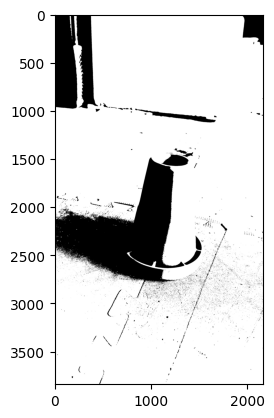

In [25]:

imgdisplay(bw)

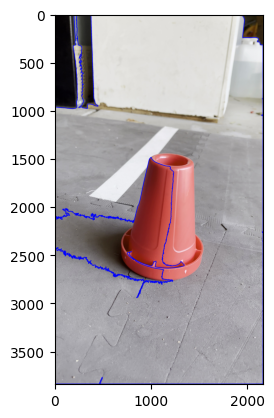

In [26]:
imgdisplay(img2)

In [27]:
blue_img, green_img, red_img = cv.split(image)  # extracting red channel
rbin, threshImg = cv.threshold(red_img, 135, 255, cv.THRESH_BINARY)

In [94]:
#creating white image of equal dimensions
filteredimg = np.full(image.shape,255,dtype=int)


#adding pixel to white image if certain bgr thresholds are met
#(b>10) and (b < 75) and (r > 90) and (g < 100)
for x in range (0,image.shape[0]):
    for y in range (0,image.shape[1]):
        # bgr values
        b = image[x][y][0]
        g = image[x][y][1]
        r = image[x][y][2]

        # apply thresholds
        if (b < 50 ) and (r > 90) and (g < 50):
            filteredimg[x][y][0] = b
            filteredimg[x][y][1] = g
            filteredimg[x][y][2] = r
# end outer for loop
# 
       
# converting threshold image to grayscale        
newgray = cv.cvtColor(filteredimg.astype(np.uint8), cv.COLOR_BGR2GRAY)

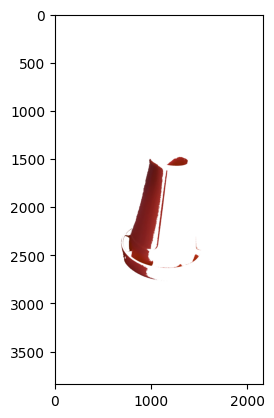

In [95]:
imgdisplay(filteredimg.astype(np.uint8))

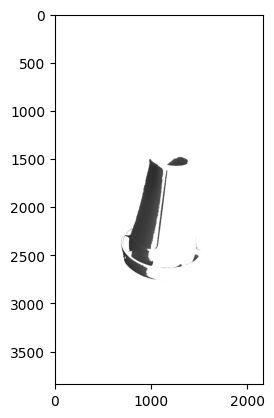

In [96]:
imgdisplay(newgray)

In [101]:

img2  = copy.deepcopy(image)

# Convert image to binary
newgray = cv.blur(newgray, (5,5), cv.BORDER_DEFAULT) 
_, bw = cv.threshold(newgray, 130, 255, cv.THRESH_BINARY)
 
# Find all the contours in the thresholded image
contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
 
for i, c in enumerate(contours):
 
    # Calculate the area of each contour
    area = cv.contourArea(c)
    
    # Ignore contours that are too small or too large
    if area < 100000 or area > 500000 :
        continue

    if area > 1000:
        print(area)
    
    # Draw each contour only for visualisation purposes
    cv.drawContours(img2, contours, i, (255, 0, 0), 20)

202455.0


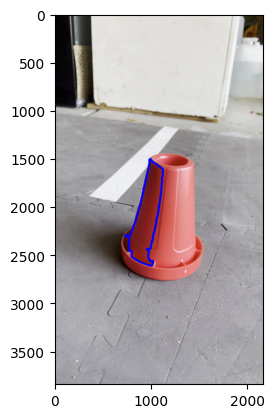

In [102]:
imgdisplay(img2)

7181803.5
21057.0
26048.5


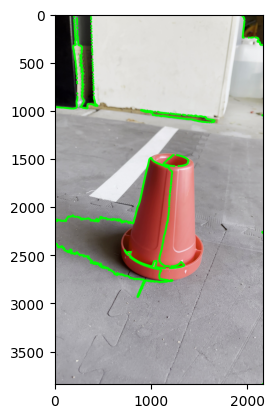

In [80]:
#read the image
img = cv.imread(img_path)
#convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#blur image to reduce the noise in the image while thresholding. #This smoothens the sharp edges in the image.
blur = cv.blur(gray, (10,10))
#Apply thresholding to the image
ret, thresh = cv.threshold(blur, 200, 255, cv.THRESH_OTSU)
#find the contours in the image
contours, heirarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for i, c in enumerate(contours):
 
    # Calculate the area of each contour
    area = cv.contourArea(c)

    if area < 10000 :
        continue
    

    print(area)


    #draw the obtained contour lines(or the set of coordinates forming a line) on the original image
    cv.drawContours(img, c, -1, (0,255,0), 20)
#show the image
#cv.namedWindow('Contours',cv.WINDOW_NORMAL)
#cv.namedWindow('Thresh',cv.WINDOW_NORMAL)
imgdisplay(img)


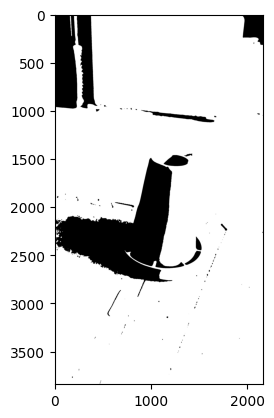

In [58]:
imgdisplay(thresh)